**Author**: CodeForAll  
**License**: MIT License

---


# Understanding Bode Plots

## What is a Bode Plot?

A Bode plot is a standard graphical tool used in control systems engineering, electronics, and signal processing to visualize the frequency response of a linear time-invariant (LTI) system. It consists of two related graphs plotted against a logarithmic frequency axis:

1.  **Magnitude Plot**: Shows the system's gain (magnitude of the output signal relative to the input signal) as a function of frequency. The magnitude is typically plotted in decibels (dB).
2.  **Phase Plot**: Shows the phase shift (the difference in phase angle between the output and input signals) as a function of frequency. The phase shift is usually plotted in degrees.

## Key Characteristics

*   **Frequency Axis**: Always logarithmic (base 10). This allows a wide range of frequencies to be displayed and highlights asymptotic behavior. Frequency is usually plotted in radians per second (rad/s) or Hertz (Hz).
*   **Magnitude Axis**: Typically logarithmic, expressed in decibels (dB). The conversion is: `Magnitude (dB) = 20 * log10(|G(jω)|)`, where `|G(jω)|` is the absolute magnitude of the system's transfer function `G(s)` evaluated at `s = jω`. A 0 dB gain means the output amplitude equals the input amplitude. Positive dB means amplification, negative dB means attenuation.
*   **Phase Axis**: Usually linear, expressed in degrees (or sometimes radians). It shows how much the phase of the output signal leads or lags the input signal at each frequency.

## Why Use Bode Plots?

Bode plots are incredibly useful for several reasons:

1.  **System Analysis**: They clearly show how a system responds to different input frequencies. You can see bandwidth, resonant frequencies, and how gain/phase changes with frequency.
2.  **Stability Analysis**: Key stability metrics like **Gain Margin (GM)** and **Phase Margin (PM)** can be directly determined from the Bode plot of the open-loop system.
    *   **Gain Crossover Frequency**: The frequency where the magnitude plot crosses 0 dB.
    *   **Phase Crossover Frequency**: The frequency where the phase plot crosses -180 degrees.
    *   **Gain Margin**: The amount of gain change (in dB) required at the phase crossover frequency to make the system marginally stable (usually measured downwards from 0 dB).
    *   **Phase Margin**: The difference between the phase at the gain crossover frequency and -180 degrees. Positive margins generally indicate stability.
3.  **Controller Design**: Engineers use Bode plots to design controllers (like PID controllers) by shaping the open-loop frequency response to meet desired stability margins and performance criteria (e.g., bandwidth, disturbance rejection).
4.  **Filter Design**: Bode plots are essential for visualizing the characteristics of electronic filters (low-pass, high-pass, band-pass, band-stop), showing their cutoff frequencies and attenuation slopes.
5.  **Asymptotic Approximations (Sketching)**: Simple rules allow for quick hand-sketching of approximate Bode plots based on the poles and zeros of the transfer function. Each pole contributes a -20 dB/decade slope change in magnitude and a -90 degree phase shift, while each zero contributes +20 dB/decade and +90 degrees. This provides valuable intuition about system behavior without complex calculations.

## Interpreting the Plots

*   **Magnitude Plot Slopes**: Slopes (e.g., -20 dB/decade, -40 dB/decade) indicate the rate at which gain changes with frequency, often related to the number of poles or zeros dominating that frequency range.
*   **Resonant Peaks**: Peaks in the magnitude plot indicate frequencies where the system has a strong response, often associated with underdamped complex poles.
*   **Phase Plot Changes**: Sharp changes in phase often occur near pole or zero frequencies.

In summary, Bode plots provide a powerful and intuitive frequency-domain perspective on system behavior, crucial for analysis, design, and understanding in many engineering disciplines.


# Python Function: Plot Bode Diagram from Coefficients

This Python function provides a convenient way to generate and display Bode plots for linear time-invariant (LTI) systems directly from their transfer function's numerator and denominator coefficients.

## Purpose

To visualize the frequency response (magnitude and phase) of a system described by a transfer function G(s).

## Dependencies

Requires the following Python libraries:

*   **`control`**: For system representation (TransferFunction) and Bode analysis (`control.bode`).
*   **`matplotlib`**: For generating the plots.
*   **`numpy`**: For numerical operations, especially frequency vector generation.

Make sure they are installed:
```bash
pip install control matplotlib numpy


In [13]:
import control
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Optional

def plot_bode_from_coeffs(
    numerator: List[float],
    denominator: List[float],
    title: str = 'Bode Plot'
) -> None:
    """
    Generates and displays the Bode plot for a transfer function defined by
    its numerator and denominator coefficients.

    Args:
        numerator: List or array-like of numerator coefficients (descending powers of s).
        denominator: List or array-like of denominator coefficients (descending powers of s).
        omega_limits: Optional tuple (omega_min, omega_max) specifying the
                      frequency range in rad/s. If None, the range is
                      determined automatically.
        title: Optional string for the plot title.

    Returns:
        None. Displays the plot.
    """
    try:
        # Create the transfer function object from the coefficients
        tf = control.TransferFunction(numerator, denominator)

        # Generate the Bode plot
        mag, phase, omega_out = control.bode_plot(
            tf,
            plot=True,
            dB=True,
            Hz=False,
            deg=True,
            label=f'G(s)'
        )

        # Find all figure handles (robust way to get the current figure)
        figs = plt.get_fignums()
        if figs:
            # Get the last figure created (presumably the Bode plot)
            fig = plt.figure(figs[-1])

            # Add a main title above the subplots
            fig.suptitle(title, fontsize=14, y=0.98)

            # Add grid to both subplots for better readability
            axes = fig.get_axes()
            if len(axes) == 2:
                 axes[0].grid(True, which='both', linestyle=':', linewidth=0.5)
                 axes[1].grid(True, which='both', linestyle=':', linewidth=0.5)

            # Adjust layout to prevent title/label overlap
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        plt.show()

    except ValueError as ve:
        print(f"Error creating Transfer Function: {ve}")
        print("Please ensure numerator and denominator are valid coefficient lists.")
    except Exception as e:
        print(f"An error occurred during Bode plot generation: {e}")



# 📈 Bode Plot for Constant Gain

This note summarizes how Bode plots behave for **constant gain** systems using the following Python logic.

---

## 🔢 System Definition

The transfer function is:

$$
G(s) = K
$$

Where $K$ is a **constant** gain. Two values of $K$ were tested:

- $K = +10$
- $K = -10$

---

## 📊 Expected Bode Characteristics

For a constant gain:

- **Magnitude (in dB)**:  
  $$
  20 \log_{10} |K|
  $$

- **Phase**:
  - $0^\circ$ for positive $K$
  - $-180^\circ$ for negative $K$

### Results

| Gain $K$ | Magnitude (dB) | Phase (°) |
|----------|----------------|-----------|
| +10      | +20.00 dB      | $0^\circ$ |
| -10      | +20.00 dB      | $-180^\circ$ |

---

## 📌 Notes

- The magnitude plot is **flat** across all frequencies because a constant gain doesn't depend on frequency.
- The phase is either **$0^\circ$** or **$-180^\circ$**, depending on the sign of $K$.



*** Plotting Bode for Constant Gain K = 10 ***
(Expected Magnitude: 20.00 dB, Expected Phase: 0 deg)


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


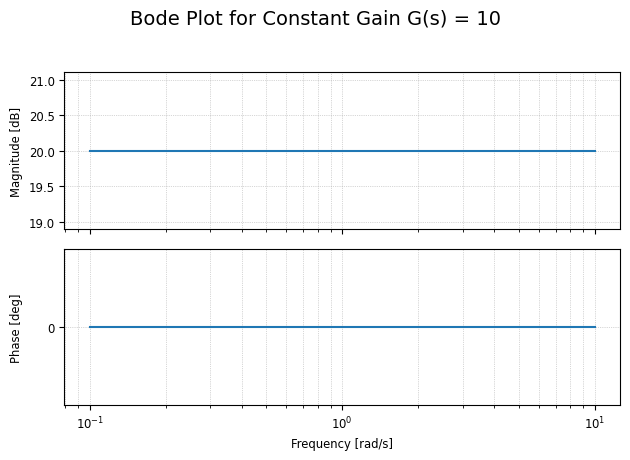

*** Constant Gain Plot Complete ***


*** Plotting Bode for Constant Gain K = -10 ***
(Expected Magnitude: 20.00 dB, Expected Phase: -180 deg)


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


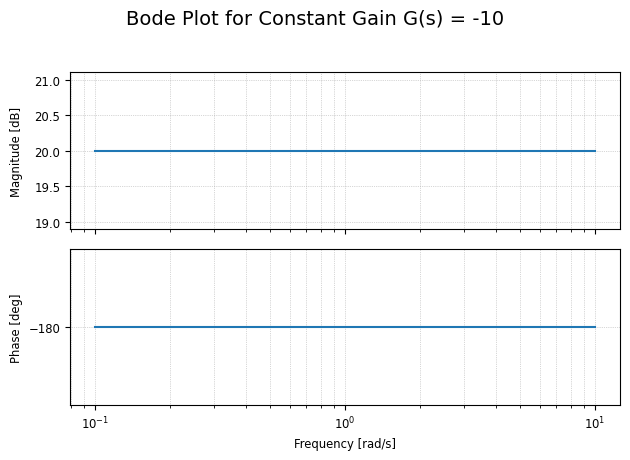

*** Constant Gain Plot Complete ***



In [18]:
# Define the constant gain K
K1 = 10 # Define positive gain here
K2 = -10 # Define negative gain here
K = (K1, K2)

for k in K:
    # Define numerator and denominator
    numerator_const = [k]
    denominator_const = [1]

    expected_db = 20 * np.log10(abs(k))
    if k < 0:
        expected_phase = -180
    else:
        expected_phase = 0

    print(f"\n*** Plotting Bode for Constant Gain K = {k} ***")
    print(f"(Expected Magnitude: {expected_db:.2f} dB, Expected Phase: {expected_phase} deg)")


    plot_bode_from_coeffs(
        numerator_const,
        denominator_const,
        title=f'Bode Plot for Constant Gain G(s) = {k}'
    )
    print("*** Constant Gain Plot Complete ***\n")

# 📈 Bode Plot: Integrator and Differentiator

This note provides an explanation of the Bode plot characteristics for two fundamental systems used in control and signal processing: the **Integrator** and the **Differentiator**.

---

## 🔢 Integrator: $G(s) = \frac{1}{s}$

The integrator system has the transfer function:

$G(s) = \frac{1}{s}$

### 🧮 Implementation

- Numerator: $[1]$
- Denominator: $[1,\ 0]$

### 📊 Bode Plot Characteristics

- **Magnitude (in dB)**:  
  $20 \log_{10} \left( \frac{1}{\omega} \right) = -20 \log_{10}(\omega)$  
  → The magnitude decreases linearly with a slope of **–20 dB/decade**.

- **Phase**:  
  Constant at **–90°** across all frequencies.  
  That is, $\angle G(j\omega) = -90^\circ$

### 📌 Notes

The integrator attenuates high-frequency components and introduces a constant phase lag of $90^\circ$. It is commonly used in controllers like PI and PID controllers.

---

## 🔢 Differentiator: $G(s) = s$

The differentiator system has the transfer function:

$G(s) = s$

### 🧮 Implementation

- Numerator: $[1,\ 0]$
- Denominator: $[1]$

### 📊 Bode Plot Characteristics

- **Magnitude (in dB)**:  
  $20 \log_{10}(\omega)$  
  → The magnitude increases linearly with a slope of **+20 dB/decade**.

- **Phase**:  
  Constant at **+90°** across all frequencies.  
  That is, $\angle G(j\omega) = -270^\circ$

### 📌 Notes

The differentiator amplifies high-frequency components and introduces a constant phase lead of $90^\circ$. It is useful in derivative control (e.g., in PD and PID controllers), but it can also amplify noise at high frequencies.

---


c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


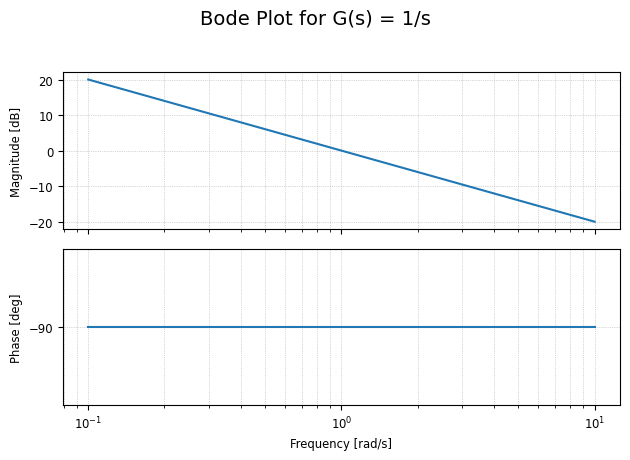

*** Plot Complete ***



c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


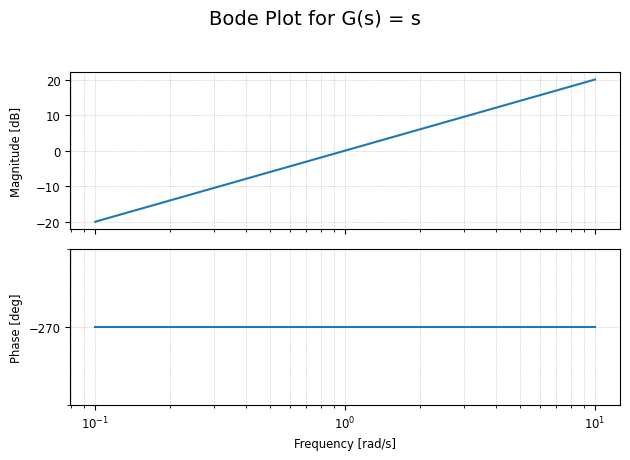

*** Plot Complete ***



In [21]:
# Define numerator and denominator
# Integrator: G(s) = 1/s
numerator_const = [1]
denominator_const = [1, 0]

plot_bode_from_coeffs(
    numerator_const,
    denominator_const,
    title=f'Bode Plot for G(s) = 1/s'
)
print("*** Plot Complete ***\n")

# Define numerator and denominator
# Integrator: G(s) = s
numerator_const = [1, 0]
denominator_const = [1]

plot_bode_from_coeffs(
    numerator_const,
    denominator_const,
    title=f'Bode Plot for G(s) = s'
)
print("*** Plot Complete ***\n")

# 🧮 Bode Plot: First-Order System with Real Pole

This note explains the Bode plot characteristics of a **first-order system** with a **real pole**.

---

## 🔢 Transfer Function

We consider the following transfer function:

$$
G(s) = \frac{1}{s + 2}
$$

- This is a **first-order low-pass system**.
- It has a **real pole** at $s = -2$.
- The system is **stable** since the pole lies in the **left-half** of the $s$-plane.

---

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


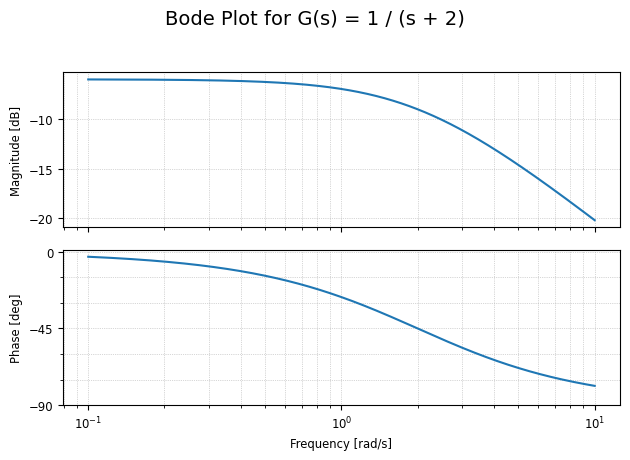

In [22]:
numerator_real_pole = [1]
denominator_real_pole = [1, 2]

plot_bode_from_coeffs(
    numerator_real_pole,
    denominator_real_pole,
    title='Bode Plot for G(s) = 1 / (s + 2)'
)

# ⚙️ Bode Plot: System with Real Zero and Real Pole

This note explains the Bode plot characteristics for a first-order system that includes **one real zero** and **one real pole**.

---

## 🔢 Transfer Function

We consider the system:

$$
G(s) = \frac{s + 1}{s + 5}
$$

- **Zero** at $s = -1$
- **Pole** at $s = -5$
- All roots are in the left-half $s$-plane → **stable system**

---

🔈 Magnitude (in dB)
$\omega \ll 1$ (much less than the zero):
Magnitude is approximately flat (0 dB).

$\omega = 1$ (at zero):
Slope increases by +20 dB/decade.

Between $\omega = 1$ and $\omega = 5$:
Magnitude continues to rise.

$\omega = 5$ (at pole):
The pole begins to counteract the gain.

$\omega \gg 5$:
Slope returns to flat (0 dB/decade).

🔁 Phase
$\omega \ll 1$:
Phase ≈ $0^\circ$

$\omega$ between 1 and 5:
Phase increases gradually, peaking at around $+45^\circ$

$\omega \gg 5$:
Phase returns toward $0^\circ$

------

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


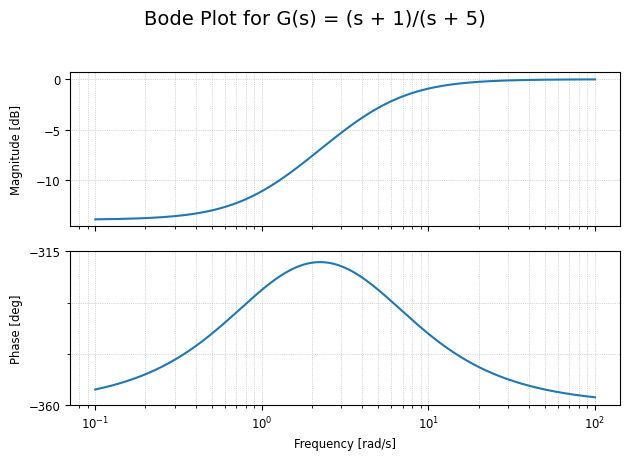

In [23]:
numerator = [1, 1]
denominator = [1, 5]

plot_bode_from_coeffs(
    numerator,
    denominator,
    title='Bode Plot for G(s) = (s + 1)/(s + 5)'
)

# 🌀 Bode Plot: Second-Order System with Complex Poles

This note describes the Bode plot behavior of a second-order system with **complex-conjugate poles**, commonly found in oscillatory systems such as RLC circuits and mechanical resonance.

---

## 🔢 Transfer Function

We consider the system:

$$
G(s) = \frac{25}{s^2 + 3s + 25}
$$

This corresponds to:

- Natural frequency: $\omega_n = 5$
- Damping ratio: $\zeta = 0.3$
- Complex poles:
  $$
  s = -\zeta\omega_n \pm j\omega_n\sqrt{1 - \zeta^2} = -1.5 \pm j4.77
  $$

---

## 📊 Bode Plot Characteristics

### 🔈 Magnitude

- At low frequencies ($\omega \ll 5$):  
  Magnitude is flat (0 dB gain).

- Near the natural frequency ($\omega \approx 5$):  
  Magnitude exhibits a **resonant peak** due to underdamping ($\zeta = 0.3$).

- At high frequencies ($\omega \gg 5$):  
  Magnitude rolls off at **–40 dB/decade** (typical for second-order systems).

---

### 🔁 Phase

- Starts near $0^\circ$ at low frequency.

- Drops through $-90^\circ$ around $\omega = 5$.

- Asymptotically approaches $-180^\circ$ at high frequencies.

---

### 📋 Bode Plot Summary Table

| Frequency Range        | Magnitude Behavior | Slope (dB/dec)   | Phase Angle         |
|------------------------|--------------------|------------------|----------------------|
| $\omega \ll 5$         | Flat               | 0                | $0^\circ$            |
| $\omega \approx 5$     | Resonant peak      | Increasing        | Drops to $-90^\circ$ |
| $\omega \gg 5$         | Decreasing         | $-40$ dB/decade  | Approaches $-180^\circ$ |

-----

c:\Users\minip\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


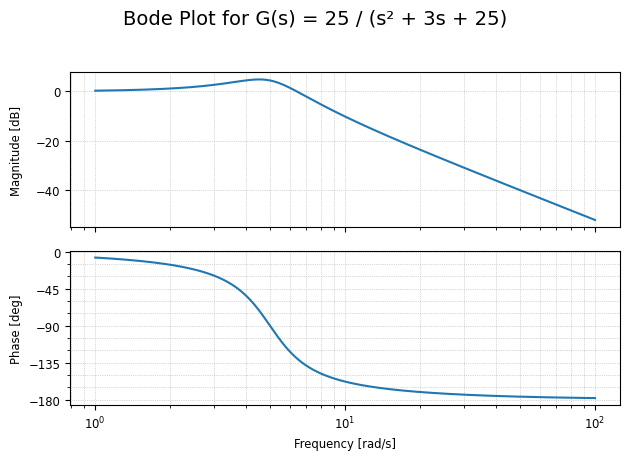

In [24]:
numerator = [25]
denominator = [1, 3, 25]

plot_bode_from_coeffs(
    numerator,
    denominator,
    title='Bode Plot for G(s) = 25 / (s² + 3s + 25)'
)